In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Pakistan= pd.read_excel("/content/Pakistan_covid_19.xlsx")

In [ ]:
print(f"We have Pakistan {len(Pakistan)/30} Months data")

We have Pakistan 21.533333333333335 Months data


In [ ]:
Pakistan.isnull().sum()

date            0
new_cases_1     0
new_cases       0
new_deaths_1    0
new_deaths      0
Recoveries1     0
Recoveries      0
dtype: int64

In [ ]:
Pakistan.head()

,date,new_cases_1,new_cases,new_deaths_1,new_deaths,Recoveries1,Recoveries
0,2020-02-25,2,2,0,0,0,0
1,2020-02-26,0,2,0,0,0,0
2,2020-02-27,0,2,0,0,0,0
3,2020-02-28,2,4,0,0,0,0
4,2020-02-29,0,4,0,0,0,0


In [ ]:
Pakistan.tail()

,date,new_cases_1,new_cases,new_deaths_1,new_deaths,Recoveries1,Recoveries
641,2021-11-27 00:00:00,303,1284189,5,28709,0,953555
642,2021-11-28 00:00:00,176,1284365,9,28718,0,953555
643,2021-11-29 00:00:00,475,1284840,10,28728,0,953555
644,2021-11-30 00:00:00,414,1285254,9,28737,0,953555
645,2021-12-01 00:00:00,377,1285631,8,28745,0,953555


In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
import plotly.offline as pyo
plotly.io.renderers.default = 'colab'

In [ ]:
# !pip install jupyterlab-plotly
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
confirmed = Pakistan.groupby('date').sum()["new_cases"].reset_index()
deaths = Pakistan.groupby('date').sum()['new_deaths'].reset_index()
recovered = Pakistan.groupby('date').sum()['Recoveries'].reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})



In [ ]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed["new_cases"], mode='markers', name='Total Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['new_deaths'], mode='markers', name='Total Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['Recoveries'], mode='markers', name='Total Recoveries', line=dict(color='Green', width=2)))
fig.update_layout(title='Total Deaths, Cases and Recoveries Comparison', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()


## Forecasting

### Confirmed (Daily Cases)

In [ ]:
!pip install pystan==2.18.0.0

!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50.0 MB 1.3 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6193975 sha256=d380583ae81bb054a023cddee001f215c574a3e2fb44271cee29d1c118549ab1
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed.columns=['ds','y']
confirmed.head()

,ds,y
0,2021-05-05,841636
1,2021-05-06,850131
2,2021-05-07,854240
3,2021-05-08,858026
4,2021-05-09,861473


In [ ]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
confirmed.head()

,ds,y
0,2021-05-05,841636
1,2021-05-06,850131
2,2021-05-07,854240
3,2021-05-08,858026
4,2021-05-09,861473


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
454,2021-05-24
455,2021-05-25
456,2021-05-26
457,2021-05-27
458,2021-05-28


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
454,2021-05-24,907617.794201,892582.123444,924468.500374
455,2021-05-25,911733.076929,895567.688053,927278.343494
456,2021-05-26,915728.762553,898307.937145,932153.779929
457,2021-05-27,919698.059959,904468.593251,935936.263178
458,2021-05-28,923643.660170,907647.064161,939902.819669


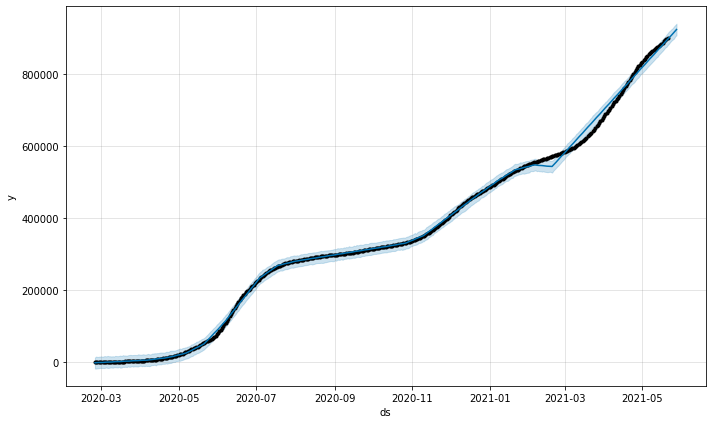

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

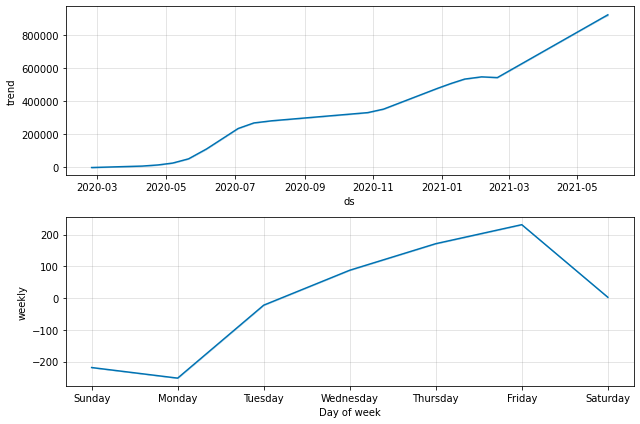

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

### Daily Deaths

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
454,2021-05-24
455,2021-05-25
456,2021-05-26
457,2021-05-27
458,2021-05-28


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
454,2021-05-24,19776.521033,19283.999913,20251.716380
455,2021-05-25,19865.424781,19394.093059,20331.710310
456,2021-05-26,19953.927932,19477.068076,20441.867893
457,2021-05-27,20037.146318,19522.395537,20532.311421
458,2021-05-28,20118.247413,19717.992798,20622.577867


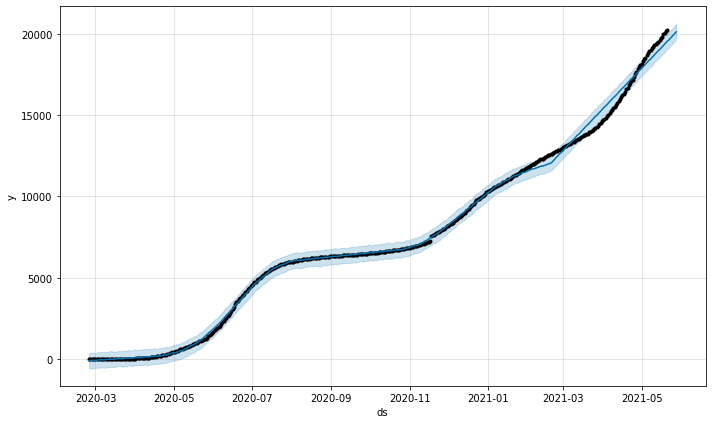

In [ ]:
deaths_forecast_plot = m.plot(forecast)

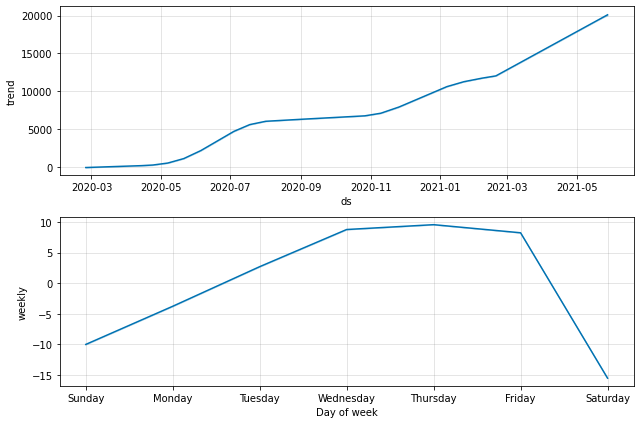

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

### Daily Recoveries

In [ ]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [ ]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
454,2021-05-24
455,2021-05-25
456,2021-05-26
457,2021-05-27
458,2021-05-28


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
454,2021-05-24,791802.703993,773374.189318,811578.918174
455,2021-05-25,794845.426010,776217.064881,811827.765580
456,2021-05-26,797949.934515,780581.208215,815656.548320
457,2021-05-27,801429.805606,783332.473381,818863.923305
458,2021-05-28,804303.118863,785359.036630,823124.592889


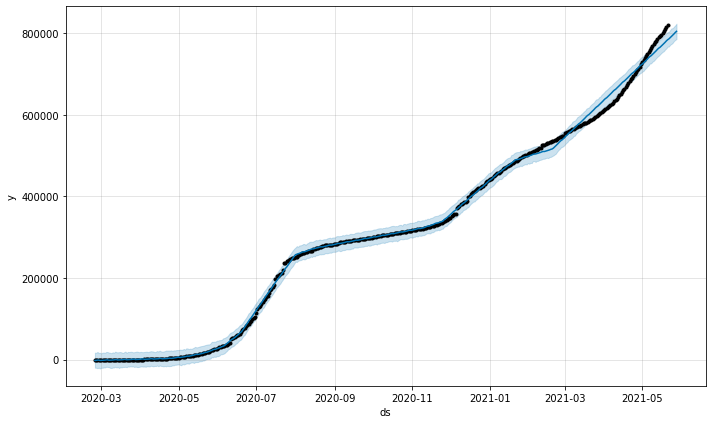

In [ ]:
recovered_forecast_plot = m.plot(forecast)

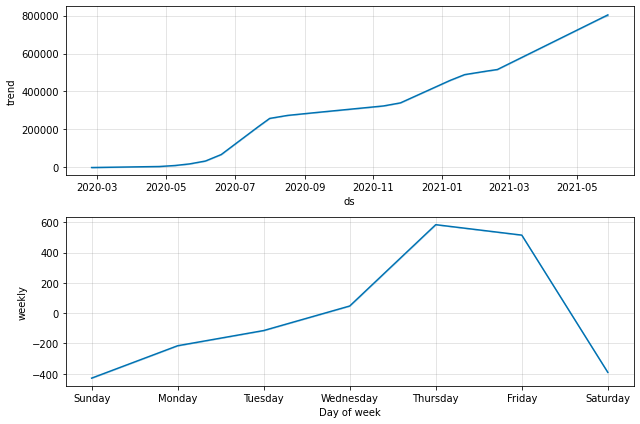

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)
